In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df1 = pd.read_csv('1-iteration.csv')
df2 = pd.read_csv('2-iteration.csv')
df3 = pd.read_csv('3-iteration.csv')
df4 = pd.read_csv('4-iteration.csv')
df5 = pd.read_csv('5-iteration.csv')

# Print the first 5 rows of the DataFrame
print(df1.head())
print(df2.head())

   episode     steps         X           Y        yaw     steer  \
0      1.0  0.615883  0.462180  131.575518 -10.744218  0.500000   
0      2.0  0.616180  0.461845  131.559408 -11.400974  0.500000   
0      3.0  0.612144  0.468768  131.160002  -7.921960  0.511700   
0      4.0  0.601042  0.485564  130.465464   6.426914  0.653304   
0      5.0  0.582740  0.506723  130.491095  14.241500  0.580985   

              throttle                action  reward   done  \
0  [-10.74421763420105                  0.5]     0.0  False   
0  [-11.40097439289093                  0.5]     1.0  False   
0  [-7.921959757804871   0.5117003172636032]     1.0  False   
0    [6.42691433429718   0.6533036530017853]     1.0  False   
0  [14.241499900817871   0.5809853225946426]     1.0  False   

   all_wheels_on_track  progress  closest_waypoint  track_len  tstamp  \
0                 True  0.421249                 0  33.275265   8.418   
0                 True  0.419901                 0  33.275265   8.486   

141.758
64.298
248.935
147.271
157.813


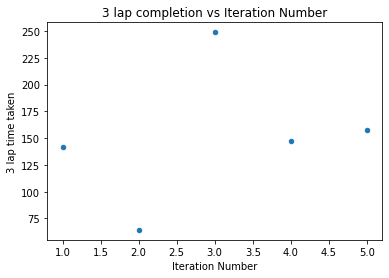

In [2]:
last_row1 = df1.iloc[-1]
tstamp1 = df1.iloc[-1]['tstamp']
last_row2 = df2.iloc[-1]
tstamp2 = df2.iloc[-1]['tstamp']
last_row3 = df3.iloc[-1]
tstamp3 = df3.iloc[-1]['tstamp']
last_row4 = df4.iloc[-1]
tstamp4 = df4.iloc[-1]['tstamp']
last_row5 = df5.iloc[-1]
tstamp5 = df5.iloc[-1]['tstamp']

print(tstamp1)
print(tstamp2)
print(tstamp3)
print(tstamp4)
print(tstamp5)

tstamps = [tstamp1, tstamp2, tstamp3, tstamp4, tstamp5]

data = pd.DataFrame({'Iteration Number': [1, 2, 3, 4, 5], 'Time taken': tstamps})

data.plot(x='Iteration Number', y='Time taken', kind='scatter')

# add plot title and axis labels
plt.title('3 lap completion vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('3 lap time taken')

# show the plot
plt.show()

7.967999999999996
15.95600000000001
143.85300000000007
57.86099999999998
65.93700000000004


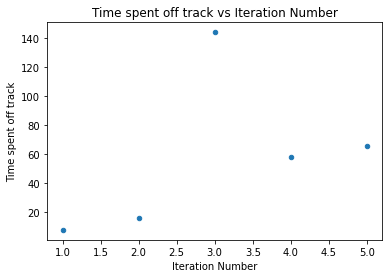

In [3]:
when_off_track1 = df1.loc[df1['episode_status'] == 'off_track']
when_off_track2 = df2.loc[df2['episode_status'] == 'off_track']
when_off_track3 = df3.loc[df3['episode_status'] == 'off_track']
when_off_track4 = df4.loc[df4['episode_status'] == 'off_track']
when_off_track5 = df5.loc[df5['episode_status'] == 'off_track']

total_time_off_track1 = when_off_track1['pause_duration'].sum()
total_time_off_track2 = when_off_track2['pause_duration'].sum()
total_time_off_track3 = when_off_track3['pause_duration'].sum()
total_time_off_track4 = when_off_track4['pause_duration'].sum()
total_time_off_track5 = when_off_track5['pause_duration'].sum()

print(total_time_off_track1)
print(total_time_off_track2)
print(total_time_off_track3)
print(total_time_off_track4)
print(total_time_off_track5)

time_off_track = [total_time_off_track1, total_time_off_track2, total_time_off_track3, total_time_off_track4, total_time_off_track5]

data = pd.DataFrame({'Iteration Number': [1, 2, 3, 4, 5], 'Time off track': time_off_track})

data.plot(x='Iteration Number', y='Time off track', kind='scatter')

# add plot title and axis labels
plt.title('Time spent off track vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Time spent off track')

# show the plot
plt.show()

133.79000000000002
48.34199999999999
105.08199999999994
89.41
91.87599999999995


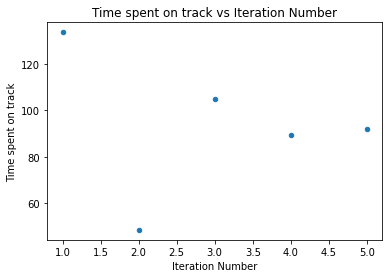

In [4]:
on_track_minus_off_track1 = tstamp1 - total_time_off_track1
on_track_minus_off_track2 = tstamp2 - total_time_off_track2
on_track_minus_off_track3 = tstamp3 - total_time_off_track3
on_track_minus_off_track4 = tstamp4 - total_time_off_track4
on_track_minus_off_track5 = tstamp5 - total_time_off_track5


print(on_track_minus_off_track1)
print(on_track_minus_off_track2)
print(on_track_minus_off_track3)
print(on_track_minus_off_track4)
print(on_track_minus_off_track5)

on_track_minus_off_track = [on_track_minus_off_track1, on_track_minus_off_track2, on_track_minus_off_track3, on_track_minus_off_track4, on_track_minus_off_track5]

data = pd.DataFrame({'Iteration Number': [1, 2, 3, 4, 5], 'on_track_minus_off_track': on_track_minus_off_track})

data.plot(x='Iteration Number', y='on_track_minus_off_track', kind='scatter')

# add plot title and axis labels
plt.title('Time spent on track vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Time spent on track')

# show the plot
plt.show()


In [5]:
plt.scatter(df['iteration'], df['progress'])
plt.title('Progress of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Progress')
plt.show()

NameError: name 'df' is not defined

In [42]:
count = (df1['episode_status'] == 'off_track').sum()
print(count)

4


In [53]:
waypoints_offtrack = df1.loc[df1['episode_status'] == 'off_track', 'closest_waypoint']
print(waypoints_offtrack)

0    22
0    29
0    33
0    54
Name: closest_waypoint, dtype: int64


In [56]:
values = df1.loc[df1['episode_status'] == 'off_track', ['steps', 'X']]
values = values.rename(columns={'steps': 'X', 'X': 'Y'})
print(values)

          X         Y
0 -4.631691  3.172700
0 -3.566905  0.958901
0 -2.037481  0.531756
0 -1.430526 -3.624890


714
0    22
0    29
0    33
0    54
Name: closest_waypoint, dtype: int64


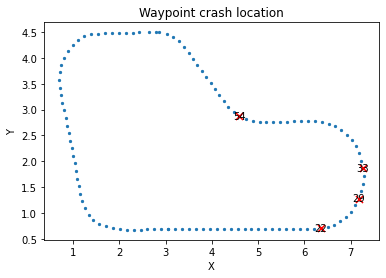

In [64]:
waypoints1 = np.load('reinvent_base1.npy')
print(waypoints1.size)

fig, ax = plt.subplots()
ax.scatter(waypoints1[:, 0], waypoints1[:, 1], s=5)

values = df1.loc[df1['episode_status'] == 'off_track', 'closest_waypoint']
print(values)

for i in range(values.shape[0]):
    waypoint_num = int(values.iloc[i])
    x, y = waypoints1[waypoint_num, 0], waypoints1[waypoint_num, 1]
    ax.scatter(x, y, s=50, marker='x', color='red')
    ax.text(x, y, str(waypoint_num), fontsize=10, ha='center', va='center')

#for i in range(waypoints1.shape[0]):
 #   ax.text(waypoints1[i, 0], waypoints1[i, 1], str(i), fontsize=10, ha='center', va='center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Waypoint crash location')
plt.show()